In [1]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (Assumes a CSV file with wav_file and gender columns)
df = pd.read_csv("gender_labels_fixed.csv")  # Update with the actual path if needed

# Display basic dataset info
print("Dataset Summary:\n", df.info())
print("\nFirst few rows:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87421 entries, 0 to 87420
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speaker_id  87421 non-null  object
 1   gender      87421 non-null  object
 2   wav_file    87421 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB
Dataset Summary:
 None

First few rows:
           speaker_id gender                                           wav_file
0  1028-20100710-hne   male  voxforge_wav_files\1028-20100710-hne\wav\ar-05...
1  1028-20100710-hne   male  voxforge_wav_files\1028-20100710-hne\wav\ar-01...
2  1028-20100710-hne   male  voxforge_wav_files\1028-20100710-hne\wav\ar-07...
3  1028-20100710-hne   male  voxforge_wav_files\1028-20100710-hne\wav\ar-02...
4  1028-20100710-hne   male  voxforge_wav_files\1028-20100710-hne\wav\rp-29...


C:\Users\fidel\AppData\Local\Temp\ipykernel_1540\402198990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='coolwarm')


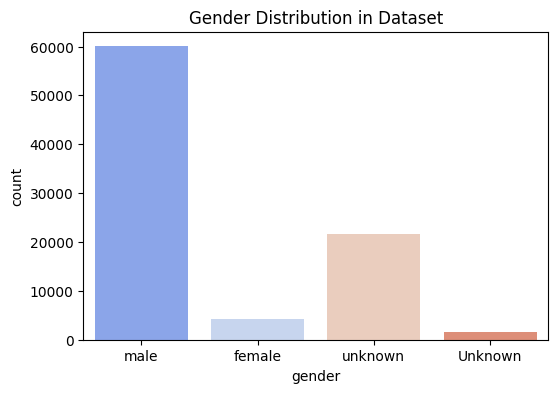

In [3]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['gender'], palette='coolwarm')
plt.title("Gender Distribution in Dataset")
plt.show()

In [4]:
# Load and visualize a sample audio file
sample_file = df['wav_file'].iloc[0]
y, sr = librosa.load(sample_file, sr=16000)

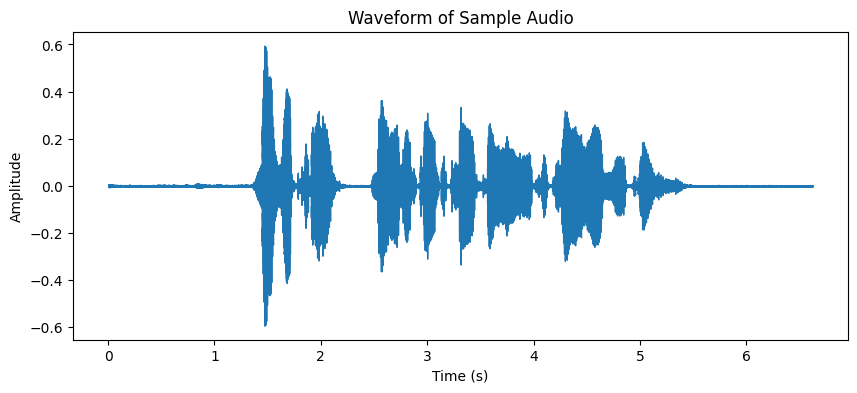

In [5]:
# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

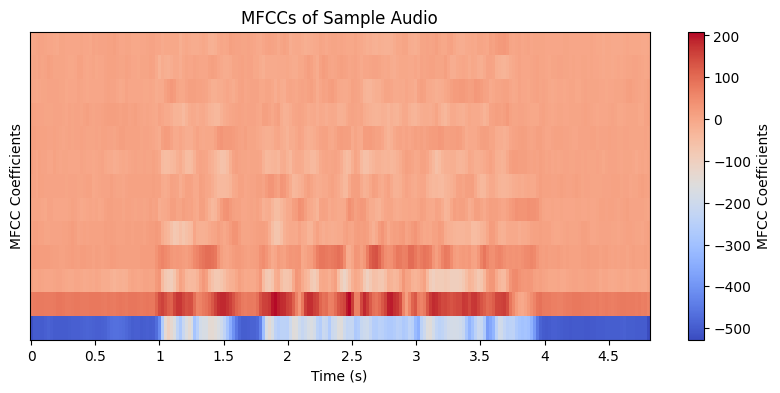

In [6]:
# Compute and plot MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
plt.colorbar(label='MFCC Coefficients')
plt.title("MFCCs of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

In [7]:
# Extract audio duration for each file
df['duration'] = df['wav_file'].apply(lambda x: librosa.get_duration(filename=x))

C:\Users\fidel\AppData\Local\Temp\ipykernel_1540\3797058614.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  df['duration'] = df['wav_file'].apply(lambda x: librosa.get_duration(filename=x))


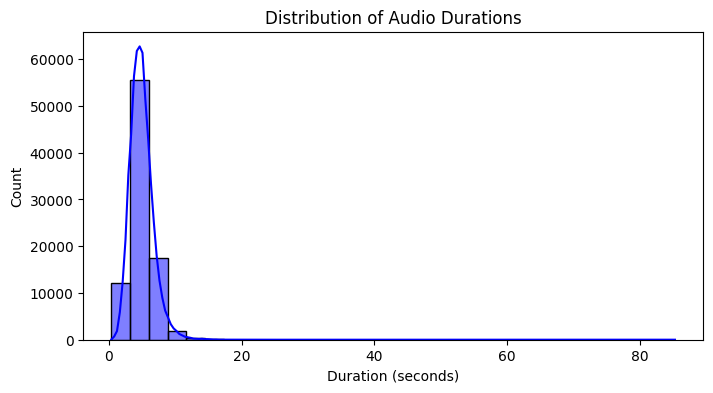

In [8]:
# Plot distribution of audio durations
plt.figure(figsize=(8, 4))
sns.histplot(df['duration'], bins=30, kde=True, color='blue')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()